## 3. Find similar wines!

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import copy

In [2]:
#Giving column names 
cols = ['Type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
# Downloading wine data from UCI.
wine_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = cols)
#making a copy to drop type column 
copy_of_data = wine_data.copy()
copy_of_data.drop(columns = 'Type', inplace = True)
#scaled data 
scaled_data = scale(copy_of_data)
# doing PCA 
pca = PCA()
pca.fit(scaled_data)
principal_data= pca.transform(scaled_data)
scaled_data_df = pd.DataFrame(scaled_data, columns = cols[1:])

dataframe = pd.DataFrame(principal_data[:,0:3], columns = ['PC1', 'PC2', 'PC3'])
final_data = pd.concat([wine_data['Type'], scaled_data_df, dataframe], axis = 1)


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [3]:
final_data.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,PC1,PC2,PC3
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3.316751,-1.443463,-0.165739
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.209465,0.333393,-2.026457
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.516740,-1.031151,0.982819
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3.757066,-2.756372,-0.176192
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.008908,-0.869831,2.026688


In [4]:
final_data.shape

(178, 17)

In [5]:
max(final_data['PC1'])

4.312783906765561

In [6]:
min(final_data['PC1'])

-4.280638778751085

In [7]:
max(final_data['PC2'])

3.8717838484072367

In [8]:
min(final_data['PC2'])

-3.5150896912197296

In [9]:
x= final_data['PC1']

In [10]:
y=final_data['PC2']

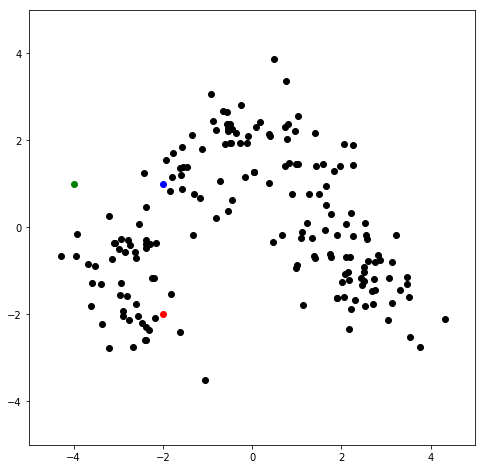

In [11]:
np.random.seed(200) # random seed 
k = 3  # initilizing k 
#random centroids 
centroids = {                       
    i+1: [np.random.randint(-4.2, 4.3), np.random.randint(-3.5, 3.8)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(8, 8))
plt.scatter(x, y, color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

   Type   Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0     1  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1     1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2     1  0.196879    0.021231  1.109334          -0.268738   0.088358   
3     1  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4     1  0.295700    0.227694  1.840403           0.451946   1.281985   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  ...    \
0       0.808997    1.034819             -0.659563         1.224884  ...     
1       0.568648    0.733629             -0.820719        -0.544721  ...     
2       0.808997    1.215533             -0.498407         2.135968  ...     
3       2.491446    1.466525             -0.981875         1.032155  ...     
4       0.808997    0.663351              0.226796         0.401404  ...     

   OD280/OD315 of diluted wines   Proline       PC1       PC2       PC3  \
0                

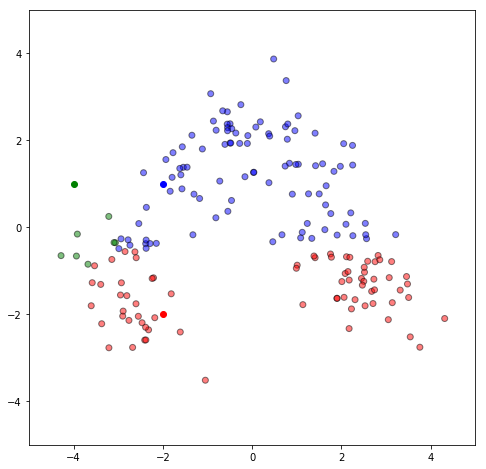

In [12]:
## The original means (Centroid) is generated arbitrarily 
#random initialization 
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['PC1'] - centroids[i][0]) ** 2
                + (df['PC2'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(final_data, centroids)
print(df.head())

fig = plt.figure(figsize=(8, 8))
plt.scatter(df['PC1'], df['PC2'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

In [13]:
df.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,...,OD280/OD315 of diluted wines,Proline,PC1,PC2,PC3,distance_from_1,distance_from_2,distance_from_3,closest,color
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,...,1.847920,1.013009,3.316751,-1.443463,-0.165739,5.345800,7.713971,5.851354,1,r
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,...,1.113449,0.965242,2.209465,0.333393,-2.026457,4.812932,6.245144,4.261920,3,b
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,...,0.788587,1.395148,2.516740,-1.031151,0.982819,4.619482,6.825942,4.952425,1,r
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,...,1.184071,2.334574,3.757066,-2.756372,-0.176192,5.806540,8.618724,6.874164,1,r
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,...,0.449601,-0.037874,1.008908,-0.869831,2.026688,3.214158,5.346535,3.542569,1,r


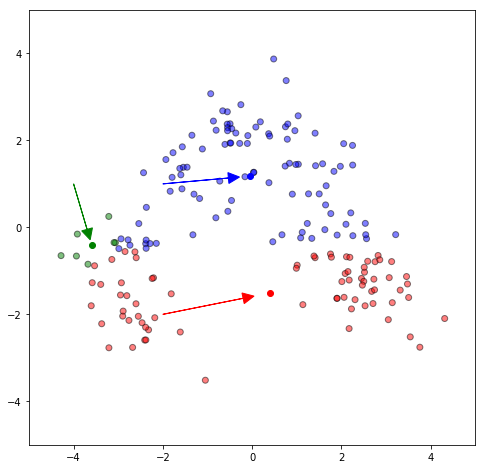

In [14]:
## Update centroids

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['PC1'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['PC2'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()
plt.scatter(df['PC1'], df['PC2'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=.25, head_length=.25, fc=colmap[i], ec=colmap[i])
plt.show()

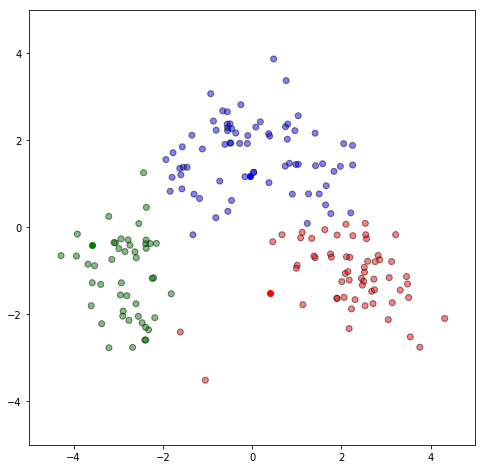

In [15]:
## Repeat Assigment of centroids 
###  K Cluster is made by connecting each observation to the nearest centroid
df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(8, 8))
plt.scatter(df['PC1'], df['PC2'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

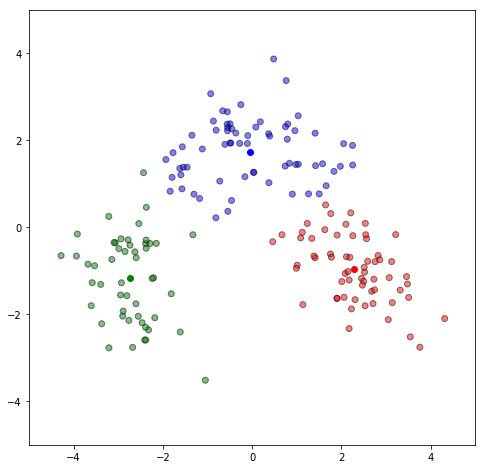

In [16]:
# repeat until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(8, 8))
plt.scatter(df['PC1'], df['PC2'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

### finally we have 3 clear clusters with 3 means at the centre of these clusters.